In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

np.random.seed(123)

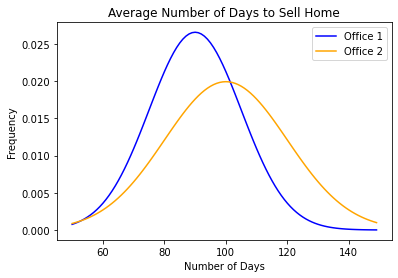

In [20]:
# Choosing the numbers on X axis so it can be visualized
x = np.arange(50, 150)

#
y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)


plt.plot(x, y1, c='blue', label = 'Office 1')
plt.plot(x, y2, c='orange', label = 'Office 2')


plt.ylabel('Frequency')
plt.xlabel('Number of Days')
plt.title('Average Number of Days to Sell Home')
plt.legend()

# Set Hypothesis

<AxesSubplot:>

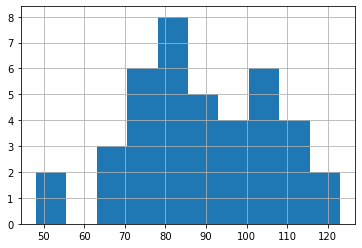

In [21]:
office_1 = pd.Series(stats.norm(90, 15).rvs(40))
office_1.hist()

<AxesSubplot:>

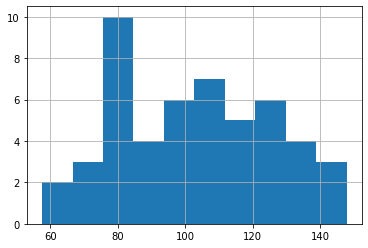

In [22]:
office_2 = pd.Series(stats.norm(100, 20).rvs(50))
office_2.hist()

In [ ]:
# Null - Office 2 mean sale time == office 2 mean sale time
# Alternative - Office 2 mean sale time != office 1 mean sale time 

# Set Alpha

In [25]:
alpha = .05

# Set Assumptions

In [ ]:
# Independent - yes (two office sets)
# Normally distributed - yes (more than 30 samples)
# variances - False

In [13]:
office_1_var = 15 ** 2
office_2_var = 20 ** 2

office_1_var, office_2_var

(225, 400)

In [18]:
# T value will only matter when we are hypothesizing a greater than or less than outome
# t statistic doesnt matter because of the two tail test/hypothesis
# P value is most important right now because we want to confirm our hypothesis


t, p = stats.ttest_ind_from_stats(100, 20, 50, 90, 15, 40, equal_var=False)
t, p

(2.7091418459143854, 0.00811206270346016)

# Conclusion

In [26]:
# Check if the p < alpha

if (p < alpha):
    print('We will reject the Null Hypothesis')

We will reject the Null Hypothesis


# QUESTION 2

In [2]:
from pydataset import data

In [66]:
mpg = data('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [67]:
mpg['fuel_efficiency'] = (mpg.hwy + mpg.cty) / 2
mpg['fuel_efficiency']

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Name: fuel_efficiency, Length: 234, dtype: float64

In [43]:
fe_cars_2008 = mpg[mpg.year == 2008].fuel_efficiency
fe_cars_2008.head()

3     25.5
4     25.5
7     22.5
10    24.0
11    23.0
Name: fuel_efficiency, dtype: float64

In [42]:
fe_cars_1999 = mpg[mpg.year == 1999].fuel_efficiency
fe_cars_1999.head()

1    23.5
2    25.0
5    21.0
6    22.0
8    22.0
Name: fuel_efficiency, dtype: float64

<AxesSubplot:>

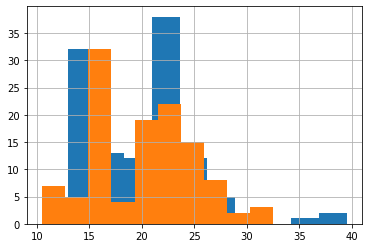

In [45]:
fe_cars_1999.hist()
fe_cars_2008.hist()

In [122]:
fe_cars_1999.count(), fe_cars_2008.count()

(117, 117)

# Set Hypothesis

In [47]:
# Null - 2008 car fuel efficiency == 1999 car fuel efficiency
# Alternative - 2008 car fuel efficiency != 1999 car fuel efficiency

# Set Alpha

In [58]:
alpha = .05

In [59]:
fe_cars_1999.var() , fe_cars_2008.var()

(27.122605363984682, 24.097480106100797)

# Set Assumptions

In [121]:
# Independent - Yes #Two different manufacture years
# Normal - Yes 
# Variance - No # variances are not the same

In [ ]:
# Levene testing to back up variances

# Computing Ttest Statistics

In [61]:
t, p = stats.ttest_ind(fe_cars_2008, fe_cars_1999, equal_var=False)

t, p

(-0.21960177245940962, 0.8263750772060638)

# Decision Making Step

In [64]:
if p < alpha:
    print('We reject the Null Hypothesis')
else:
    print('We fail to reject the Null Hypothesis')
    

We fail to reject the Null Hypothesis


# NUMBER 2.b
Are compact cars more fuel-efficient than the average car?

In [68]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [ ]:
# Null - compact cars fuel efficiency == overall car fuel efficiency
# Alternate - compact car fuel efficiency > overall car fuel efficiency

In [88]:
alpha = .05

In [71]:
mpg = mpg.rename(columns={'class' : 'class_type'})
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class_type,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [74]:
overall_efficiency = mpg.fuel_efficiency.mean()
overall_efficiency

20.14957264957265

<AxesSubplot:>

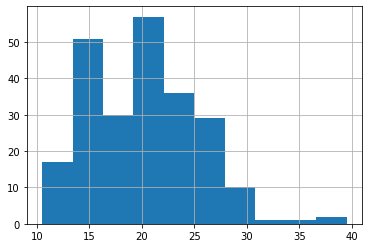

In [95]:
mpg.fuel_efficiency.hist()

In [112]:
compact_efficiency = mpg.fuel_efficiency[mpg.class_type == 'compact']
compact_efficiency.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: fuel_efficiency, dtype: float64

In [90]:
t, p = stats.ttest_1samp(compact_efficiency, overall_efficiency, alternative = 'greater')
t, p

(7.896888573132535, 2.0992818971585668e-10)

# Decision

In [92]:
if (t > 0) and (p < alpha):
    print('Reject the Null hypothesis')
else:
    print('Do not reject the null hypothesis')

Reject the Null hypothesis


# NUMBER 2.c
Do manual cars get better gas mileage than automatic cars?

# Create Hypothesis

In [111]:
# Null - Manual cars gas mileage == automatic cars gas mileage
# Alternate - Manual cars gas mileage > automatic cars gas mileage

In [118]:
alpha = .05

In [96]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class_type,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [108]:
man_car_fe = mpg[mpg.trans.str.contains('manual')].fuel_efficiency
man_car_fe.head()

2     25.0
3     25.5
6     22.0
8     22.0
10    24.0
Name: fuel_efficiency, dtype: float64

In [106]:
auto_car_fe = mpg[mpg.trans.str.contains('auto')].fuel_efficiency
auto_car_fe.head()

1    23.5
4    25.5
5    21.0
7    22.5
9    20.5
Name: fuel_efficiency, dtype: float64

<AxesSubplot:>

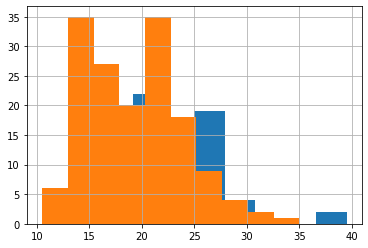

In [109]:
man_car_fe.hist()
auto_car_fe.hist()

In [115]:
man_v = man_car_fe.var()
auto_v = auto_car_fe.var()

man_v, auto_v

(26.635167464114826, 21.942777233382337)

In [125]:
t, p = stats.ttest_ind(man_car_fe , auto_car_fe ,equal_var = False, alternative = 'greater')
t, p/2

(4.443514012903071, 4.488062249979483e-06)

In [120]:
if (t > 0) and (p < alpha):
    print('Reject the Null')
else:
    print('Do not reject the Null')

Reject the Null
